## Imports

In [1]:
from Problem import CutProblem
from Crossover_op import OnePointCrossover, UniformCrossover, CountPreservingCrossover
from Mutation_op import SwapMutation
from ParentSelection_op import ParentTournamentSelection, ParentUniformSelection
from GenerationSelection_op import ElitistSelection, RoundRobinSelection
import Experiment as exp
from GA import GA
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot(exps, title):
    plt.xlabel("Generations")
    plt.ylabel("Fitness")
    plt.title(title)
    for exp in exps:
        plt.plot(exp.mean_results(), label=exp.name)
    
    plt.legend()

## Problem

In [4]:
#Cut Problem
n_windows = 100
window_w = 7
window_h = 2
bar_length = 10

cut_problem = CutProblem('CutProblem', n_windows, window_w, window_h, bar_length)

## Operators

In [5]:
#operators
sample_size = 5
mutation_rate = 0.1

# crossover
point_cx = OnePointCrossover()
uni_cx = UniformCrossover(p=0.5)
count_cx = CountPreservingCrossover()

# mutation
swap_mutation = SwapMutation(mutation_rate)

# parent selection
tournament_parent = ParentTournamentSelection(sample_size)
#uniform_parent = ParentUniformSelection(0.2)

# generation selection
elitist_selection = ElitistSelection(False)
robin_selection = RoundRobinSelection(sample_size, maximize=False)

## Experiments

In [7]:
#GA
pop_size = 100
parents_n = pop_size/2
generations = 100
n = 30

## Crossover comparison

In [8]:
problem = cut_problem
mutation = swap_mutation
parent_s = tournament_parent
gen_s = robin_selection

algs = []
algs.append(GA("Uni_cx", cut_problem, uni_cx, swap_mutation, parent_s, gen_s, pop_size=pop_size, parents_n=parents_n, limit=generations))
algs.append(GA("Point_cx", cut_problem, point_cx, swap_mutation, parent_s, gen_s, pop_size=pop_size, parents_n=parents_n, limit=generations))
algs.append(GA("Count_cx", cut_problem, count_cx, swap_mutation, parent_s, gen_s, pop_size=pop_size, parents_n=parents_n, limit=generations))
    
exps = []
for alg in algs:
    e = exp.Experiment(alg.name)
    e.run(alg,n)
    exps.append(e)

Gen: 0
[1, 0, 0, 0, 1, 1, 0, 1, 0, 0], Fitness: 320
Gen: 0
[0, 0, 1, 1, 0, 1, 1, 1, 1, 1], Fitness: 310
Gen: 0
[1, 0, 1, 0, 1, 0, 1, 0, 1, 1], Fitness: 290
Gen: 0
[1, 0, 1, 0, 0, 0, 1, 1, 0, 1], Fitness: 280
Gen: 0
[1, 0, 0, 1, 0, 1, 0, 1, 1, 0], Fitness: 280
Gen: 0
[1, 0, 1, 0, 1, 0, 1, 0, 0, 1], Fitness: 300
Gen: 0
[1, 0, 1, 0, 0, 0, 0, 0, 1, 1], Fitness: 270
Gen: 0
[1, 1, 1, 1, 1, 0, 0, 0, 1, 1], Fitness: 320
Gen: 0
[1, 0, 0, 1, 1, 0, 0, 1, 0, 1], Fitness: 300
Gen: 0
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1], Fitness: 280
Gen: 0
[1, 0, 1, 0, 1, 0, 1, 0, 1, 0], Fitness: 290
Gen: 0
[0, 1, 0, 1, 0, 0, 1, 0, 1, 1], Fitness: 290
Gen: 0
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], Fitness: 290
Gen: 0
[0, 1, 1, 0, 0, 0, 0, 1, 1, 0], Fitness: 310
Gen: 0
[0, 1, 0, 0, 1, 0, 0, 0, 0, 1], Fitness: 290
Gen: 0
[0, 0, 1, 1, 0, 0, 0, 1, 1, 0], Fitness: 290
Gen: 0
[0, 1, 0, 1, 0, 1, 1, 0, 0, 1], Fitness: 300
Gen: 0
[0, 1, 1, 0, 0, 1, 0, 1, 1, 0], Fitness: 280
Gen: 0
[0, 0, 1, 0, 0, 1, 1, 0, 0, 0], Fitness: 290
Gen: 0
[1, 0

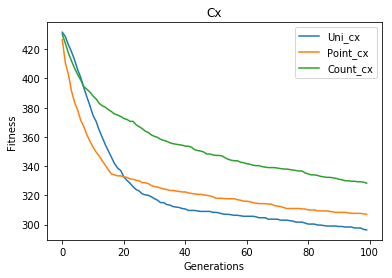

In [9]:
plot(exps, 'Cx')

## Selection comparison

In [10]:
problem = cut_problem
cx = uni_cx
mutation = swap_mutation
parent_s = tournament_parent
gen_s = elitist_selection

algs = []
algs.append(GA("Elitist", cut_problem, cx, swap_mutation, parent_s, elitist_selection, pop_size=pop_size, parents_n=parents_n, limit=generations))
algs.append(GA("Robin", cut_problem, cx, swap_mutation, parent_s, robin_selection, pop_size=pop_size, parents_n=parents_n, limit=generations))
#algs.append(GA("Count_cx", cut_problem, cx, swap_mutation, parent_s, gen_s, pop_size=pop_size, parents_n=parents_n, limit=generations))
    
exps = []
for alg in algs: 
    e = exp.Experiment(alg.name)
    e.run(alg,n)
    exps.append(e)

Gen: 0
[0, 0, 1, 0, 1, 1, 0, 0, 1, 0], Fitness: 280
Gen: 0
[1, 0, 0, 1, 0, 0, 1, 0, 1, 0], Fitness: 290
Gen: 0
[1, 0, 1, 0, 1, 0, 0, 1, 0, 0], Fitness: 270
Gen: 0
[1, 0, 1, 0, 1, 0, 1, 0, 0, 0], Fitness: 280
Gen: 0
[0, 1, 0, 0, 1, 0, 0, 1, 0, 1], Fitness: 270
Gen: 0
[1, 0, 1, 0, 1, 0, 0, 0, 1, 1], Fitness: 290
Gen: 0
[0, 1, 0, 1, 0, 0, 0, 1, 1, 0], Fitness: 260
Gen: 0
[0, 1, 1, 0, 0, 0, 1, 1, 1, 1], Fitness: 260
Gen: 0
[1, 0, 0, 1, 1, 0, 1, 0, 0, 1], Fitness: 280
Gen: 0
[0, 1, 0, 1, 0, 0, 1, 1, 0, 1], Fitness: 290
Gen: 0
[0, 0, 1, 1, 0, 0, 1, 0, 1, 1], Fitness: 270
Gen: 0
[0, 1, 1, 0, 0, 0, 1, 0, 1, 0], Fitness: 260
Gen: 0
[0, 1, 0, 0, 0, 1, 1, 0, 1, 0], Fitness: 260
Gen: 0
[0, 0, 1, 0, 1, 1, 0, 0, 1, 1], Fitness: 290
Gen: 0
[1, 0, 1, 0, 0, 0, 1, 0, 1, 0], Fitness: 280
Gen: 0
[1, 0, 1, 0, 1, 0, 1, 0, 1, 1], Fitness: 280
Gen: 0
[0, 0, 1, 1, 0, 0, 1, 1, 0, 0], Fitness: 270
Gen: 0
[0, 1, 1, 1, 1, 1, 0, 1, 1, 0], Fitness: 270
Gen: 0
[1, 0, 0, 0, 1, 1, 0, 0, 0, 1], Fitness: 280
Gen: 0
[1, 0

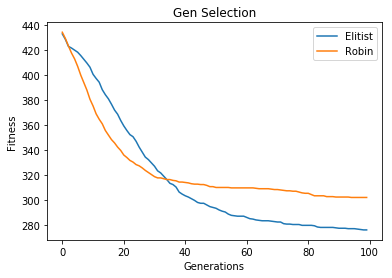

In [11]:
plot(exps, 'Gen Selection')

In [12]:
problem = cut_problem
mutation = swap_mutation
mutation.p = 0.5
parent_s = tournament_parent
gen_s = elitist_selection

algs = []
algs.append(GA("Uni_cx", cut_problem, uni_cx, swap_mutation, parent_s, gen_s, pop_size=pop_size, parents_n=parents_n, limit=generations))
algs.append(GA("Point_cx", cut_problem, point_cx, swap_mutation, parent_s, gen_s, pop_size=pop_size, parents_n=parents_n, limit=generations))
algs.append(GA("Count_cx", cut_problem, count_cx, swap_mutation, parent_s, gen_s, pop_size=pop_size, parents_n=parents_n, limit=generations))
    
exps = []
for alg in algs: 
    e = exp.Experiment(alg.name)
    e.run(alg,n)
    exps.append(e)

Gen: 0
[0, 1, 1, 0, 0, 1, 0, 1, 1, 0], Fitness: 270
Gen: 0
[0, 1, 0, 0, 1, 0, 0, 1, 0, 1], Fitness: 260
Gen: 0
[1, 0, 1, 0, 1, 1, 1, 1, 1, 0], Fitness: 280
Gen: 0
[0, 1, 0, 1, 0, 1, 0, 0, 0, 0], Fitness: 290
Gen: 0
[1, 0, 0, 1, 0, 1, 0, 0, 1, 1], Fitness: 260
Gen: 0
[0, 1, 0, 1, 1, 0, 0, 1, 1, 0], Fitness: 280
Gen: 0
[0, 0, 1, 1, 0, 0, 1, 1, 0, 0], Fitness: 270
Gen: 0
[0, 1, 1, 0, 0, 0, 1, 0, 1, 0], Fitness: 270
Gen: 0
[0, 0, 1, 1, 0, 0, 1, 0, 1, 1], Fitness: 270
Gen: 0
[0, 1, 1, 1, 1, 1, 0, 1, 1, 0], Fitness: 280
Gen: 0
[1, 0, 1, 0, 1, 0, 0, 1, 0, 1], Fitness: 250
Gen: 0
[0, 1, 1, 0, 1, 0, 1, 0, 1, 0], Fitness: 300
Gen: 0
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0], Fitness: 280
Gen: 0
[1, 0, 0, 1, 0, 0, 1, 0, 1, 0], Fitness: 280
Gen: 0
[0, 1, 1, 0, 0, 1, 0, 0, 1, 0], Fitness: 270
Gen: 0
[0, 1, 1, 0, 1, 0, 0, 1, 1, 1], Fitness: 270
Gen: 0
[1, 0, 1, 0, 1, 0, 1, 0, 0, 1], Fitness: 280
Gen: 0
[1, 0, 0, 1, 1, 0, 0, 0, 1, 0], Fitness: 270
Gen: 0
[0, 1, 0, 0, 0, 1, 0, 1, 0, 1], Fitness: 280
Gen: 0
[1, 0

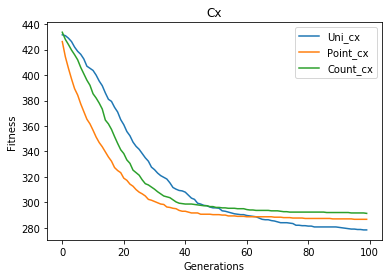

In [13]:
plot(exps, 'Cx')